<h1>2023.05.19. 강의 시간내 실습</h1>

In [17]:
import warnings

warnings.filterwarnings('ignore')

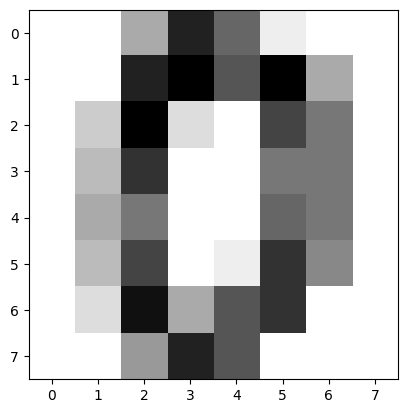

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [19]:
import tensorflow.keras as keras
from keras import Sequential
import numpy as np

In [20]:
X = digits.images
y = digits.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train = X_train / 16.0
X_test = X_test / 16.0

In [23]:
X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 8, 8, 1)

In [24]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [28]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
N_EPOCHS = 10

In [31]:
history = model.fit(X_train, y_train, batch_size=32, epochs=N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 2.0457 - accuracy: 0.5080 - val_loss: 1.4910 - val_accuracy: 0.8583
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.9138 - accuracy: 0.8260 - val_loss: 0.4972 - val_accuracy: 0.9028
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8942 - val_loss: 0.2827 - val_accuracy: 0.9306
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.9235 - val_loss: 0.2104 - val_accuracy: 0.9389
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9353 - val_loss: 0.2107 - val_accuracy: 0.9444
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9499 - val_loss: 0.1594 - val_accuracy: 0.9556
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.9610 - val_loss: 0.1404 - val_accuracy: 0.9667
Epoch 8/10
45/45 [==

In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'\n테스트 정확도: {test_acc*100:.2f}%')

12/12 - 0s - loss: 0.1162 - accuracy: 0.9500 - 27ms/epoch - 2ms/step

테스트 정확도: 95.00%


In [39]:
predictions = model.predict(X_test)

print(predictions)
print(len(predictions))

12/12 [==============================] - 0s 1ms/step
[[1.8193749e-03 4.7971480e-06 4.3882170e-07 ... 7.6479256e-07
  1.0781486e-03 5.2823538e-07]
 [1.7337020e-03 5.9325153e-05 2.8143163e-06 ... 2.0953473e-04
  1.5652942e-02 9.4709343e-01]
 [2.4069885e-07 6.4205310e-08 2.3852085e-04 ... 7.9026995e-06
  2.2883090e-04 6.8283691e-05]
 ...
 [1.6318470e-02 2.6438886e-04 9.8159048e-04 ... 7.0610815e-03
  9.5930248e-01 3.0624166e-03]
 [4.6363694e-04 2.3885403e-07 9.0994472e-03 ... 3.2308678e-06
  2.8305377e-03 1.0328301e-03]
 [3.9553273e-04 5.2533260e-08 1.4516779e-06 ... 9.1691045e-06
  3.8953705e-04 1.6123381e-03]]
360


In [40]:
print(predictions[0])

[1.8193749e-03 4.7971480e-06 4.3882170e-07 6.9828815e-07 5.6584331e-04
 9.9898607e-04 9.9553055e-01 7.6479256e-07 1.0781486e-03 5.2823538e-07]


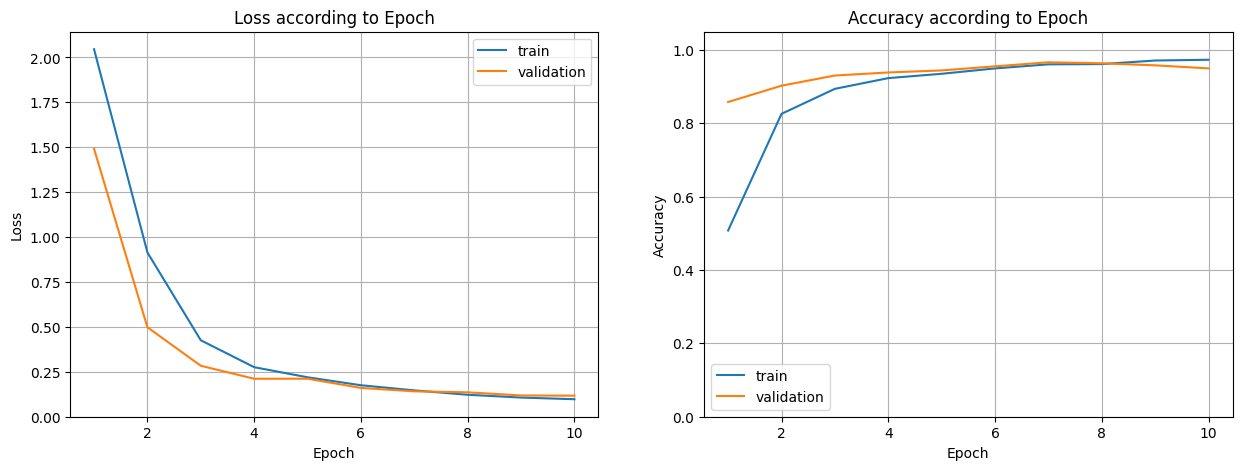

In [41]:
import pandas as pd

df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = range(1, N_EPOCHS+1)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(df_hist['epoch'], df_hist['loss'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_loss'], label = 'validation')
# plt.ylim([0, 1.5])
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(df_hist['epoch'], df_hist['accuracy'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_accuracy'], label='validation')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()